Electric Propulsion Test Code #1

In [4]:
import matplotlib.pyplot as plt
from math import sqrt
import pandas as pd
import numpy as np

Inputs

In [30]:
data = pd.read_excel('Electric_Rockets_and_Solar_Panels.xlsx')
# based on the excel choose the row location of the one you want
iont = 3
hallt = 0
solarp = 6
# choose the amount of Ion and Hall thrusters
ionnumber = 1
hallnumber = 1
# choose the weight of the spacecraft
totalweight = 900000

In [6]:
# From Solar Panels
pp = data.iloc[solarp,1] # power per panel
spweight = data.iloc[solarp,2] # solar panel weight
paneleff = data.iloc[solarp,3] # this is in kW/m^3

In [7]:
# From Ion Thruster Chosen
ionisp = data.iloc[iont,1] # in s
ionthrust = data.iloc[iont,6]*(10**-3) # in mN so converting to N
ioneff = data.iloc[iont,3] # in %
ionfuelmw = data.iloc[iont,4] 
ionweight = data.iloc[iont,5] # in kg

# From Hall Thruster Chosen 
hallisp = data.iloc[hallt,1] # in s
hallthrust = data.iloc[hallt,6]*(10**-3) # in mN so converting to N
halleff = data.iloc[hallt,3] # in %
hallfuelmw = data.iloc[hallt,4] 
hallweight = data.iloc[hallt,5] # in kg

Electric Prop Equations

In [26]:
ge = 9.81 # earth gravity
a = 7.34 # q/m for xenon got it from the book (10^5 C/kg)
# Ion Thrusters
ionVa = ((ionisp*ge)**2)/(2*(ge/ionfuelmw))
ionEP = (ionthrust*ionisp*ge)/(2*ioneff)
ionI = ionEP/ionVa
ionUe = (2*a*ionVa)/ionfuelmw
ionmdot = (2*ionEP)/(ionUe**2)
# Hall Thrusters
hallVa = ((hallisp*ge)**2)/(2*(ge/hallfuelmw))
hallEP = (hallthrust*hallisp*ge)/(2*halleff)
hallI = hallEP/hallVa
hallUe = (2*a*hallVa)/hallfuelmw
hallmdot = (2*hallEP)/(hallUe**2)
print(f"Ion Thruster Electric Power (ionEP): {ionEP*10**-3} kW")
print(f"Hall Thruster Electric Power (hallEP): {hallEP*10**-3} kW")

Ion Thruster Electric Power (ionEP): 6.928943142857144 kW
Hall Thruster Electric Power (hallEP): 109.31142857142859 kW


Get the Thrust

In [22]:
time = np.arange(0, 500)
ones_array = np.ones((500, 1))
# Choose how often hall thrusters are used in hours
halltime = 24 # in hours (so it fires once every hour right now)
# Ion total Thrust
iontotalthrust = ionthrust*ionnumber*ones_array
#*time*60*60*24
# Hall total Thrust
halltotalthrust = hallthrust*hallnumber*ones_array
#*time*halltime
# Total Thrust
totalthrust = (iontotalthrust + halltotalthrust)*ones_array

Get the Acceleration of the Spacecraft

In [42]:
# total weight of spacecraft
totalweight = totalweight+(ionweight*ionnumber)+(hallweight*hallnumber)

t = np.full((500, 1), totalweight)
# Ion total Accceleration
iontotalaccel = iontotalthrust/t
# Hall total Acceleration
halltotalaccel = halltotalthrust/t
# Total Acceleration
totalaccel = iontotalaccel+halltotalaccel

Get the Speed of the Spacecraft

In [ ]:
initialv0 = 0 

iontotalspeed = iontotalthrust
# Hall total Thrust
halltotalspeed = hallthrust*hallnumber*ones_array
#*time*halltime
# Total Thrust
totalspeed = (iontotalspeed+ halltotalspeed)

Graphs Against Time Depending on Number of Engines Chosen

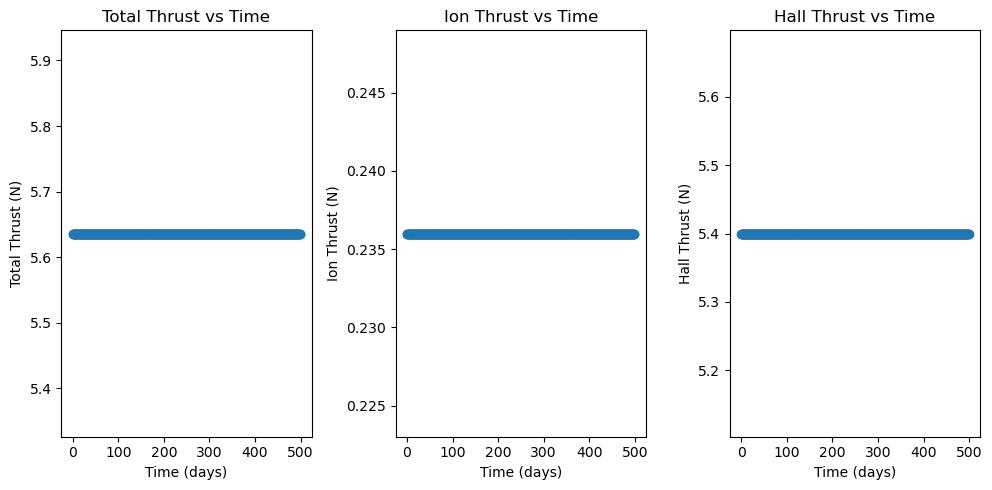

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Total Thrust
axs[0].scatter(time, totalthrust)
axs[0].set_xlabel('Time (days)')
axs[0].set_ylabel('Total Thrust (N)')
axs[0].set_title('Total Thrust vs Time')

# Ion Thrust
axs[1].scatter(time, iontotalthrust)
axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('Ion Thrust (N)')
axs[1].set_title('Ion Thrust vs Time')

# Hall Thrust
axs[2].scatter(time, halltotalthrust)
axs[2].set_xlabel('Time (days)')
axs[2].set_ylabel('Hall Thrust (N)')
axs[2].set_title('Hall Thrust vs Time')

plt.tight_layout()
plt.show()

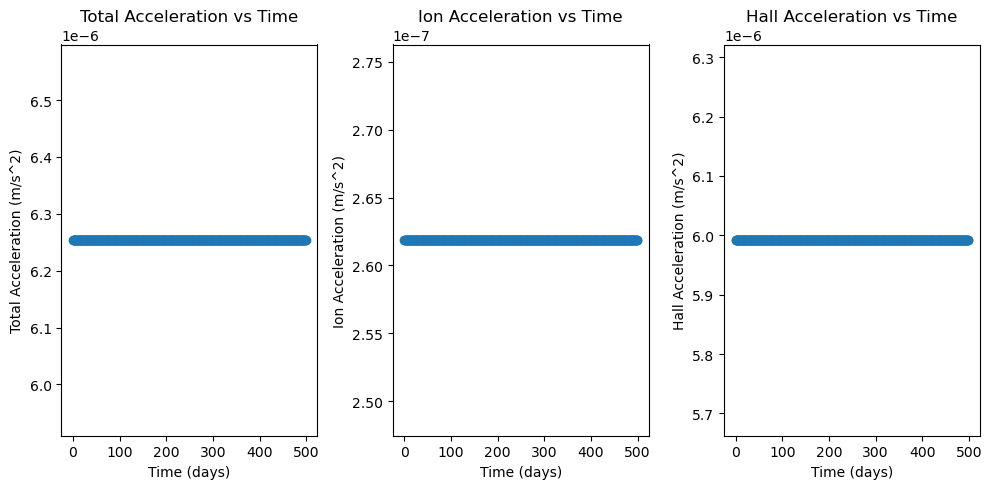

In [43]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Total Thrust
axs[0].scatter(time, totalaccel)
axs[0].set_xlabel('Time (days)')
axs[0].set_ylabel('Total Acceleration (m/s^2)')
axs[0].set_title('Total Acceleration vs Time')

# Ion Thrust
axs[1].scatter(time, iontotalaccel)
axs[1].set_xlabel('Time (days)')
axs[1].set_ylabel('Ion Acceleration (m/s^2)')
axs[1].set_title('Ion Acceleration vs Time')

# Hall Thrust
axs[2].scatter(time, halltotalaccel)
axs[2].set_xlabel('Time (days)')
axs[2].set_ylabel('Hall Acceleration (m/s^2)')
axs[2].set_title('Hall Acceleration vs Time')

plt.tight_layout()
plt.show()